In [34]:
#Import important dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv("Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [37]:
df.isnull().sum()

,0
Position,0
Level,0
Salary,0


In [38]:
df.shape

(10, 3)

In [39]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


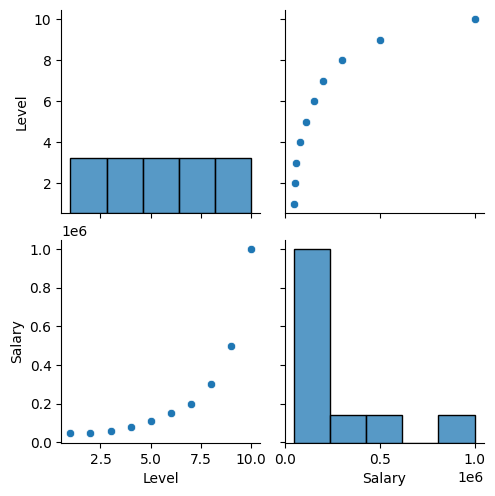

In [40]:
sns.pairplot(df)

In [41]:
df = df.drop(['Position'],axis=1)

In [43]:
x = df.drop(['Salary'],axis= 1)
y = df['Salary']

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [46]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred = regressor.predict(x_test)
print(y_pred)

[550732.75862069 -64482.75862069]


In [50]:
print('Training Accuracy', regressor.score(x_train, y_train))
print('Testing Accuracy', regressor.score(x_test,y_test))

Training Accuracy 0.6366049276570868
Testing Accuracy 0.8451346684575974


In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures()
x_poly=poly_reg.fit_transform(x_train)
regressor1=LinearRegression()
regressor1.fit(x_poly,y_train)
x_poly_test=poly_reg.transform(x_test)

In [52]:
print('Training Accuracy',regressor1.score(x_poly,y_train))
print('Testing Accuracy',regressor1.score(x_poly_test,y_test))

Training Accuracy 0.928077628049796
Testing Accuracy 0.7666492889299961


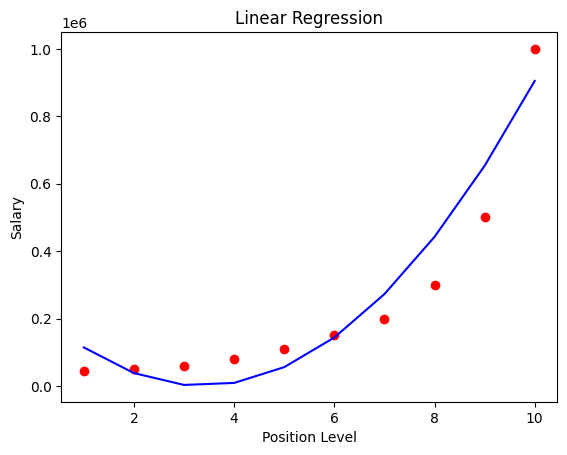

In [53]:
plt.scatter(x,y,color='red')
plt.plot(x,regressor1.predict(poly_reg.fit_transform(x)),color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
''